In [1]:
# Standard scientific Python imports
#import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers



In [7]:
import os
import cv2

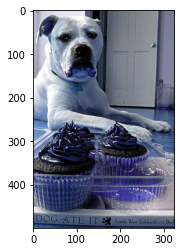

[[[179 186 205]
  [176 181 202]
  [187 179 202]
  ...
  [121 115 140]
  [123 114 140]
  [117 117 141]]

 [[184 185 205]
  [176 185 205]
  [183 184 205]
  ...
  [113 118 139]
  [116 117 138]
  [111 116 137]]

 [[185 184 204]
  [185 188 209]
  [182 182 206]
  ...
  [108 122 140]
  [115 121 140]
  [116 120 139]]

 ...

 [[ 64 111 155]
  [ 66 106 155]
  [ 77 109 158]
  ...
  [  9  20  48]
  [  1  21  46]
  [  0  24  46]]

 [[ 55 103 151]
  [ 41 100 150]
  [ 57 101 154]
  ...
  [ 15  18  56]
  [  5  17  53]
  [  3  20  53]]

 [[ 73 109 163]
  [ 59 104 161]
  [ 70 101 162]
  ...
  [ 26  55  99]
  [ 19  52  97]
  [ 18  55  99]]]


In [30]:
DATADIR=""
categories=["dogs", "cats"]
for categ in categories:
    path=os.path.join(DATADIR, categ)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img))
        plt.imshow(img_array, cmap="gray")
        plt.show()
        print(img_array)
        break
    break

In [28]:
np.shape(img_array)


(500, 325, 3)

In [29]:
img_array

array([[[179, 186, 205],
        [176, 181, 202],
        [187, 179, 202],
        ...,
        [121, 115, 140],
        [123, 114, 140],
        [117, 117, 141]],

       [[184, 185, 205],
        [176, 185, 205],
        [183, 184, 205],
        ...,
        [113, 118, 139],
        [116, 117, 138],
        [111, 116, 137]],

       [[185, 184, 204],
        [185, 188, 209],
        [182, 182, 206],
        ...,
        [108, 122, 140],
        [115, 121, 140],
        [116, 120, 139]],

       ...,

       [[ 64, 111, 155],
        [ 66, 106, 155],
        [ 77, 109, 158],
        ...,
        [  9,  20,  48],
        [  1,  21,  46],
        [  0,  24,  46]],

       [[ 55, 103, 151],
        [ 41, 100, 150],
        [ 57, 101, 154],
        ...,
        [ 15,  18,  56],
        [  5,  17,  53],
        [  3,  20,  53]],

       [[ 73, 109, 163],
        [ 59, 104, 161],
        [ 70, 101, 162],
        ...,
        [ 26,  55,  99],
        [ 19,  52,  97],
        [ 18,  55,  99]]

In [51]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [33]:
from keras.datasets import cifar10

In [63]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [64]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [48]:
np.shape(X_train)

(50000, 32, 32, 3)

In [49]:
np.shape(X_test)

(10000, 32, 32, 3)

In [50]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [65]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [70]:
X_train.shape[1]

32

In [7]:
image_size = (224,224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)


Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory images. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [4]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0C08-4FAB

 Directory of C:\Users\ceida\Desktop\Duomenumokslas\projektas_drabuziai

04/20/2022  06:55 PM    <DIR>          .
04/20/2022  06:55 PM    <DIR>          ..
04/20/2022  06:24 PM    <DIR>          .idea
04/19/2022  10:44 PM    <DIR>          .ipynb_checkpoints
04/11/2022  07:39 PM    <DIR>          cats
04/06/2022  08:16 PM       161,125,320 clothing-dataset-master.zip
04/19/2022  10:52 PM           506,474 Digit_MNP.ipynb
04/11/2022  07:39 PM    <DIR>          dogs
04/19/2022  10:22 PM    <DIR>          fruits-360-original-size
04/19/2022  10:21 PM       578,873,667 fruits-360-original-size.zip
04/07/2022  09:20 PM    <DIR>          images
01/17/2021  12:36 PM           291,660 images.csv
04/20/2022  06:32 PM           362,772 images_new.csv
04/19/2022  10:41 PM       824,894,548 kagglecatsanddogs_3367a.zip
01/17/2021  12:36 PM             7,048 LICENSE
04/07/2022  08:35 PM               544 main.py
04/20/2022  06:55 